# Import

In [1]:
from quspin.basis import spin_basis_1d,photon_basis,boson_basis_1d,tensor_basis # Hilbert space bases
from quspin.operators import hamiltonian # Hamiltonian and observables
from quspin.tools.measurements import obs_vs_time # t_dep measurements
from quspin.tools.Floquet import Floquet,Floquet_t_vec # Floquet Hamiltonian
from quspin.basis.photon import coherent_state # HO coherent state
import numpy as np # generic math functions
import matplotlib.pyplot as plt
import pylab

# Model parameters

In [27]:
N_osc=2 # number of harmonic oscillators
N_lev=5 # number of energy levels of oscillators
N_tot=N_lev**N_osc # total number of states of all photons
Omega=1.0 # frequency of the oscillator
A=0.2 # spin-photon coupling strength (drive amplitude)
Delta=1.0 # difference between atom energy levels

In [28]:
N_ph_avg=N_lev//2

In [29]:
2*N_tot

50

# Hamiltonian of a two-state atom in a reservoir of harmonic oscillators 

For the purpose of our study, we take a two-level atom (i.e. a single-site spin chain) and couple it to multiple photon mode (i.e. a quantum harmonic oscillators). The Hamiltonian reads: 
$$ H = \sum_{k=1}^{N_{osc}} \Omega_k a_k^\dagger a_k + \frac{A}{2} \frac{1}{\sqrt{N_{ph~avg}}} \sum_k (a_k^\dagger + a_k) \sigma^x + \Delta \sigma^z$$
where the operator $a^\dagger$ creates a photon in the mode, and the atom is modelled by a two-level system described by the Pauli spin operators $\sigma^{x,y,z}$. 
$N_{osc}$ is the number of harmoniv oscillators in the reservoir, $N_{lev}$ - number of energy levels of a single photon mode.
The photon frequency is $\Omega$, $N_{ph}$ is the average number of photons in a single mode, $A$ - the coupling between the EM field $E=\sum_{k=1}^{N_{osc}}\sqrt{N_{ph~avg}^{-1}}(a_k^\dagger + a_k)$, and the dipole operator $\sigma^x$, and $\Delta$ measures the energy difference between the two atomic states.

To set up the spin-photon Hamiltonian, we first build the site-coupling lists. The ph_energy list does not require the specification of a lattice site index, since the latter is not defined forthe photon sector. The at_energy list, on the other hand, requires the input of the lattice sitefor the $\sigma^z$-operator:  since we consider a single two-level system or, equivalently – a single-site chain, this index is 0. The spin-photon coupling lists absorb and emit also require the site index which refers to the corresponding Pauli matrices: in this model – 0 again due to dimensional constraints.

In [30]:
# define operator site-coupling lists
ph_energy=[[Omega,i,i] for i in range(N_osc)] # photon energy
at_energy=[[Delta,0]] # atom energy, 0 because the "lattice" is single-site
absorb=[[A/(2.0*np.sqrt(N_ph_avg)),0,i] for i in range(N_osc)] # absorption term	
emit=[[A/(2.0*np.sqrt(N_ph_avg)),0,i] for i in range(N_osc)] # emission term

To build the static operator list, we use the $|$ symbol in the operator string to distinguish the spin and photon operators: spin operators always come to the left of the $|$-symbol,  while photon operators - to the right. For convenience, the identity operator $I$ can be omitted, suchthat $I|n$ is the same as $|n$, and $z|I$ is equivalent to $z|$, respectively. The dynamic list is empty since the spin-photon Hamiltonian is time-independent.

In [31]:
# define static and dynamics lists
static=[["|+-",ph_energy],["+|-",absorb],["-|+",emit],["z|",at_energy]]
dynamic=[]

To build the spin-photon basis, we call the function photon_basis and use spin_basis_1d as the first argument. We need to specify the number of spin lattice sites, and the total numberof harmonic oscillator (a.k.a photon) states.

In [32]:
# compute atom-photon basis
#basis_photon_particle=photon_basis(spin_basis_1d, L=1, Nph=L_lev)
basis_osc=boson_basis_1d(L=N_osc,sps=N_lev)
basis_spin = spin_basis_1d(L=1)
basis = tensor_basis(basis_spin,basis_osc) 
print(basis)

reference states: 
array index   /   Fock state   /   integer repr. 
	 0.         |1>           1         |4 4>           24  
	 1.         |1>           1         |4 3>           23  
	 2.         |1>           1         |4 2>           22  
	 3.         |1>           1         |4 1>           21  
	 4.         |1>           1         |4 0>           20  
	 5.         |1>           1         |3 4>           19  
	 6.         |1>           1         |3 3>           18  
	 7.         |1>           1         |3 2>           17  
	 8.         |1>           1         |3 1>           16  
	 9.         |1>           1         |3 0>           15  
	10.         |1>           1         |2 4>           14  
	11.         |1>           1         |2 3>           13  
	12.         |1>           1         |2 2>           12  
	13.         |1>           1         |2 1>           11  
	14.         |1>           1         |2 0>           10  
	15.         |1>           1         |1 4>            9  
	16

In [33]:
# compute atom-photon Hamiltonian H
H=hamiltonian(static,dynamic,dtype=np.float64, basis=basis, check_symm=False, check_pcon=False, check_herm=False)

In [34]:
print('Number of states of Hamiltonian:', H.Ns)

Number of states of Hamiltonian: 50


# Spectrum 

In [35]:
# calculate entire spectrum only
eigenvalues = H.eigvalsh()

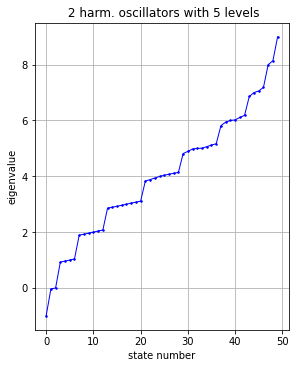

In [36]:
##### plot spectra
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(4,5))
x = np.arange(H.Ns)
#for level in x :
#    ax.plot(x,np.full(H.Ns,eigenstates[level]), '-', color='silver', lw=0.3)
ax.plot(x,eigenvalues, '.-', color='b', lw=1., ms=3)
ax.set(xlabel='state number', ylabel='eigenvalue', title='%2.0i' % N_osc + ' harm. oscillators with%2.0i' %N_lev + ' levels')
ax.grid(True)
plt.show()

# Initial state

In [37]:
psi_ph_i=coherent_state(np.sqrt(100/2),100+1)

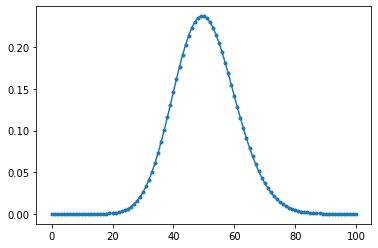

In [38]:
plt.plot(psi_ph_i, '.-')

In [14]:
# one of the eigenvectors 
E,psi_0 = H.eigsh(k=1,sigma=4)
psi_0 = psi_0.reshape((-1,))
#print(psi_0)

In [15]:
N_lev*N_osc/1.5

6.666666666666667

In [16]:
psi_0.shape

(50,)

# Calculate time evolution

The next step is to define a vector of stroboscopic times, using the class Floquet_t_vec.

In [17]:
# define time vector over 30 driving cycles with 100 points per period
t=Floquet_t_vec(Omega,30) # t.i = initial time, t.T = driving period

We now time evolve the initial state susing the hamiltonian class method evolve. We define the solution psi_t as a generator expression using the optional argument iterate=True.

In [18]:
# evolve atom-photon state with Hamiltonian H
psi_t=H.evolve(psi_0,t.i,t.vals,iterate=True,rtol=1E-9,atol=1E-9) 

# Observables

Last, we define the observables of interest, using the hamiltonian class with unit coupling constants. 
Since each observable represents a single operator, we refrain from defining operator lists and set up the observables inline.  
The Python dictionaries obs_args and obs_args_sc represent another way of passing optional keyword arguments to the hamiltonian function. Here we also disable the automatic symmetry and hermiticity checks.

In [19]:
# define observables parameters
obs_args={"basis":basis,"check_herm":False,"check_symm":False, "check_pcon" : False}

In [20]:
# in atom-photon Hilbert space
n=hamiltonian([["|+-", [[1.0,0,0]] ]],[],dtype=np.float64,**obs_args)
sz=hamiltonian([["z|",[[1.0,0]] ]],[],dtype=np.float64,**obs_args)
sy=hamiltonian([["y|",[[1.0,0]] ]],[],dtype=np.complex128,**obs_args)

We  calculate  the  time-dependent  expectation  values  using  the measurements tool function obs_vs_time. Its  arguments  are  the  time-dependent  state psi_t,  the  vector  of times t.vals, and a dictionary of all observables of interest. obs_vs_time returns a dictionary with all time-dependent expectations stored under the same keys they were passed. 

In [21]:
Obs_t = obs_vs_time(psi_t,t.vals,{"n":n,"sz":sz,"sy":sy})
#Obs_t = obs_vs_time((psi_0,eigenstates,eigenvalues),t.vals,{"n":n, "sz":sz,"sy":sy})
O_n, O_sz, O_sy = Obs_t["n"], Obs_t["sz"], Obs_t["sy"]

# Plot time evolution

/home/gorbunov8a/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gorbunov8a/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gorbunov8a/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


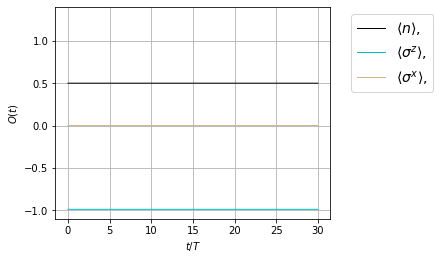

In [41]:
# plot spin-photon data
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True,figsize=(6,3.5))
ax.plot(t.vals/t.T,O_n/N_lev,"k",linewidth=1,label="$\\langle n\\rangle,$")
ax.plot(t.vals/t.T,O_sz,"c",linewidth=1,label="$\\langle\\sigma^z\\rangle,$")
ax.plot(t.vals/t.T,O_sy,"tan",linewidth=1,label="$\\langle\\sigma^x\\rangle,$")
ax.set(xlabel="$t/T$", ylabel=r'$O(t)$', ylim=[-1.1,1.4]); ax.grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
plt.show()